###Obrada informacija

#4. Laboratorijska vježba:  Multivarijatni financijski vremenski nizovi

*Prosinac 2023.*

##Upute

U ovoj bilježnici dana je priprema sa svim uputama za 4. laboratorijsku vježbu iz predmeta Obrada informacija - uz bilježnicu su dostupni i podatci u datoteci `prices.csv`.

Vaš zadatak je u bilježnicu na odgovarajuća mjesta dopisati kod Vašeg rješenja,.

**Riješenu bilježnicu potrebno je predati kao izvještaj u .pdf formatu na *Moodle* najkasnije do 14.1.2024. u 23:59h. Datoteka koju predajete se mora zvati *PrezimeImeJMBAG.pdf*.**



## Uvod

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne dnevne cijene 24 ETF-a (eng. *exchange traded fund*) koji prate određene dioničke, obvezničke ili druge indekse.

Oznaka | Naziv | Klasa imovine
--- | --- | ---
SPY | SPDR S&P 500 ETF Trust | Equity: U.S. - Large Cap
IEFA | iShares Core MSCI EAFE ETF | Equity: Developed Markets Ex-U.S. - Total Market
VWO | Vanguard FTSE Emerging Markets ETF | Equity: Emerging Markets - Total Market
EWJ | iShares MSCI Japan ETF | Equity: Japan - Total Market
XLF | Financial Select Sector SPDR Fund | Equity: U.S. Financials
XLK | Technology Select Sector SPDR Fund | Equity: U.S. Technology
XLV | Health Care Select Sector SPDR Fund | Equity: U.S. Health Care
XLY | Consumer Discretionary Select Sector SPDR Fund | Equity: U.S. Consumer Cyclicals
XLP | Consumer Staples Select Sector SPDR Fund | Equity: U.S. Consumer Non-cyclicals
XLU | Utilities Select Sector SPDR Fund | Equity: U.S. Utilities
XLI | Industrial Select Sector SPDR Fund | Equity: U.S. Industrials
XLE | Energy Select Sector SPDR Fund | Equity: U.S. Energy
XLC | Communication Services Select Sector SPDR Fund | Equity: U.S. Telecommunications
XLRE | Real Estate Select Sector SPDR Fund | Equity: U.S. Real Estate
XLB | Materials Select Sector SPDR Fund | Equity: U.S. Basic Materials
BND | Vanguard Total Bond Market ETF | Fixed Income: U.S. - Broad Market |  Broad-based Investment Grade
LQD | iShares iBoxx USD Investment Grade Corporate Bond ETF | Fixed Income: U.S. - Corporate |  Broad-based Investment Grade
BNDX | Vanguard Total International Bond ETF | Fixed Income: Global Ex-U.S. - Broad Market |  Broad-based Investment Grade
SHV | iShares Short Treasury Bond ETF | Fixed Income: U.S. - Government |  Treasury Investment Grade Ultra-Short Term
HYG | iShares iBoxx USD High Yield Corporate Bond ETF | Fixed Income: U.S. - Corporate |  Broad-based High Yield
GLD | SPDR Gold Trust | Commodities: Precious Metals Gold
SLV | iShares Silver Trust | Commodities: Precious Metals Silver
PDBC | Invesco Optimum Yield Diversified Commodity Strategy No K-1 ETF | Commodities: Broad Market
USO | United States Oil Fund LP | Commodities: Energy Crude Oil

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, koristit ćemo aritmetičke povrate:

$R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$

gdje je $S(t)$ cijena vrijednosnice u danu $t$. U sklopu ove laboratorijske vježbe cilj je analizirati kretanje danih ETF-ova i izračunati glavne komponente (PCA) koje utječu na njihovu dinamiku. Laboratorijsku vježbu je potrebno riješiti unutar ove bilježnice i predati riješenu bilježnicu kao izvještaj.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

prices = pd.read_csv("prices.csv")
prices.set_index("Time", inplace=True)
prices.index = pd.to_datetime(prices.index)

prices.head()

,SPY,IEFA,VWO,EWJ,XLF,XLK,XLV,XLY,XLP,XLU,...,XLB,BND,LQD,BNDX,SHV,HYG,GLD,SLV,PDBC,USO
Time,,,,,,,,,,,,,,,,,,,,,
2019-01-02,228.403641,45.796803,32.461216,45.781605,21.425070,58.594608,77.260376,94.483681,43.373131,43.356884,...,45.167751,67.512207,92.559242,46.240116,95.842651,58.963661,121.330002,14.56,8.201962,78.800003
2019-01-03,222.953278,45.495949,31.952288,45.521481,20.943409,55.637482,75.691597,92.437935,43.123962,43.348557,...,43.886906,67.775871,92.600182,46.240116,95.877365,58.992794,122.430000,14.75,8.261633,79.599998
2019-01-04,230.421265,46.874874,32.961674,47.064281,21.639147,58.103325,77.949570,95.497078,44.043327,43.990444,...,45.612503,67.571701,92.542915,46.197544,95.903488,59.982925,121.440002,14.73,8.380974,81.440002
2019-01-07,232.238052,47.100510,33.029510,47.180885,21.665901,58.622952,78.248802,97.656494,43.983185,43.690346,...,45.772594,67.469627,92.551117,46.086876,95.903488,60.565334,121.860001,14.67,8.446068,82.320000
2019-01-08,234.420044,47.434795,33.216133,47.405128,21.683739,59.114239,78.856377,98.736206,44.387012,44.232204,...,46.252922,67.384583,92.755562,46.052830,95.894760,60.958515,121.529999,14.69,8.516588,84.000000


# Zadatak 1 - Računanje korelacijske matrice i matrice kovarijance povrata

1.1. U prvom zadatku ove laboratorijske vježbe potrebno je prvo iz danih cijena (gore učitanih u Pandas DataFrame) izračunati dnevne povrate za sve pojedine vrijednosnice (prateći formulu danu u uvodu).

Izračunajte srednje povrate i volatilnost (standardnu devijaciju povrata) za svaku pojedinu vrijednosnicu. Pri analizi srednjih povrata i volatilnosti, te se brojke često *anualiziraju* - to znači da se srednji povrati pomnože s $252$ (cca. broj trgovinskih dana u godini), a volatilnost s $\sqrt{252}$.

**Izračunajte anualizirane srednje povrate i volatilnosti. Sve ETF-ove prikažite u dijagramu raspršenja s volatilnošću na x-osi i srednjim povratom na y-osi.**

Razmislite - koji se ETF-ovi ističu po odnosu povrata i rizika (posebno dobri ili posebno loši kao investicije)?


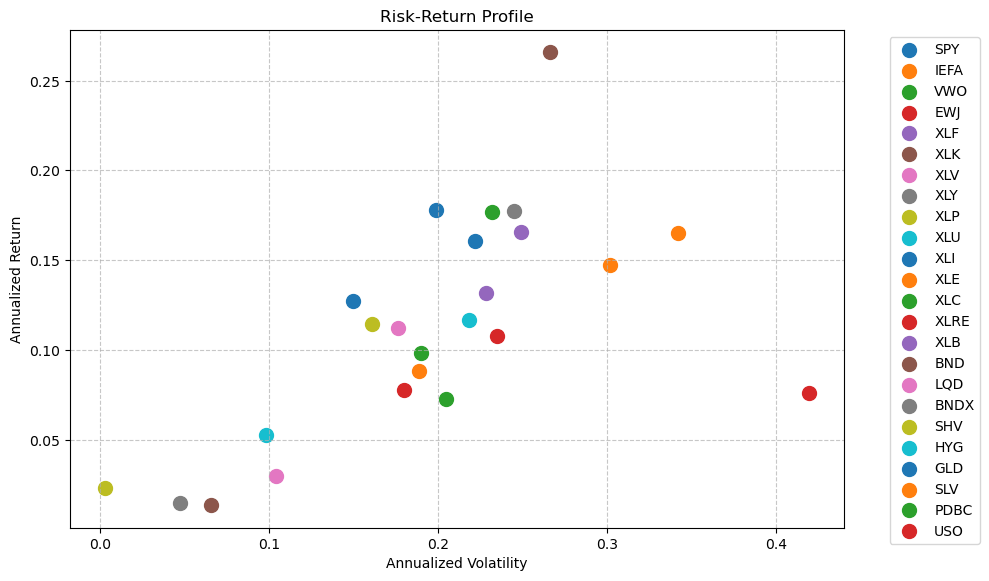

In [19]:
change = prices.pct_change()
tickers = list(change.columns)

mean_return_annualized = change.mean() * 252
mean_volatility_annualized = change.std() * np.sqrt(252)
plt.figure(figsize=(10, 6))

for i, ticker in enumerate(tickers):
    plt.scatter(
        mean_volatility_annualized[ticker],
        mean_return_annualized[ticker],
        s=100,
        label=ticker,
    )

plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.title("Risk-Return Profile")

plt.grid(True, linestyle="--", alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()

plt.show()

1.2. Kovarijancu i korelaciju moguće je iz podataka izračunati koristeći Pandas, ali i NumPy ili neke druge biblioteke.

**Koristeći dnevne povrate, izračunajte matricu kovarijance $\Sigma$ i matricu korelacije $C$ povrata svih ETF-ova.
Matrice ispišite u konzolu ili vizualizirajte.**

Proučite strukturu matrice i razmislite o tome koje zajedničke komponente u podatcima možete očekivati.

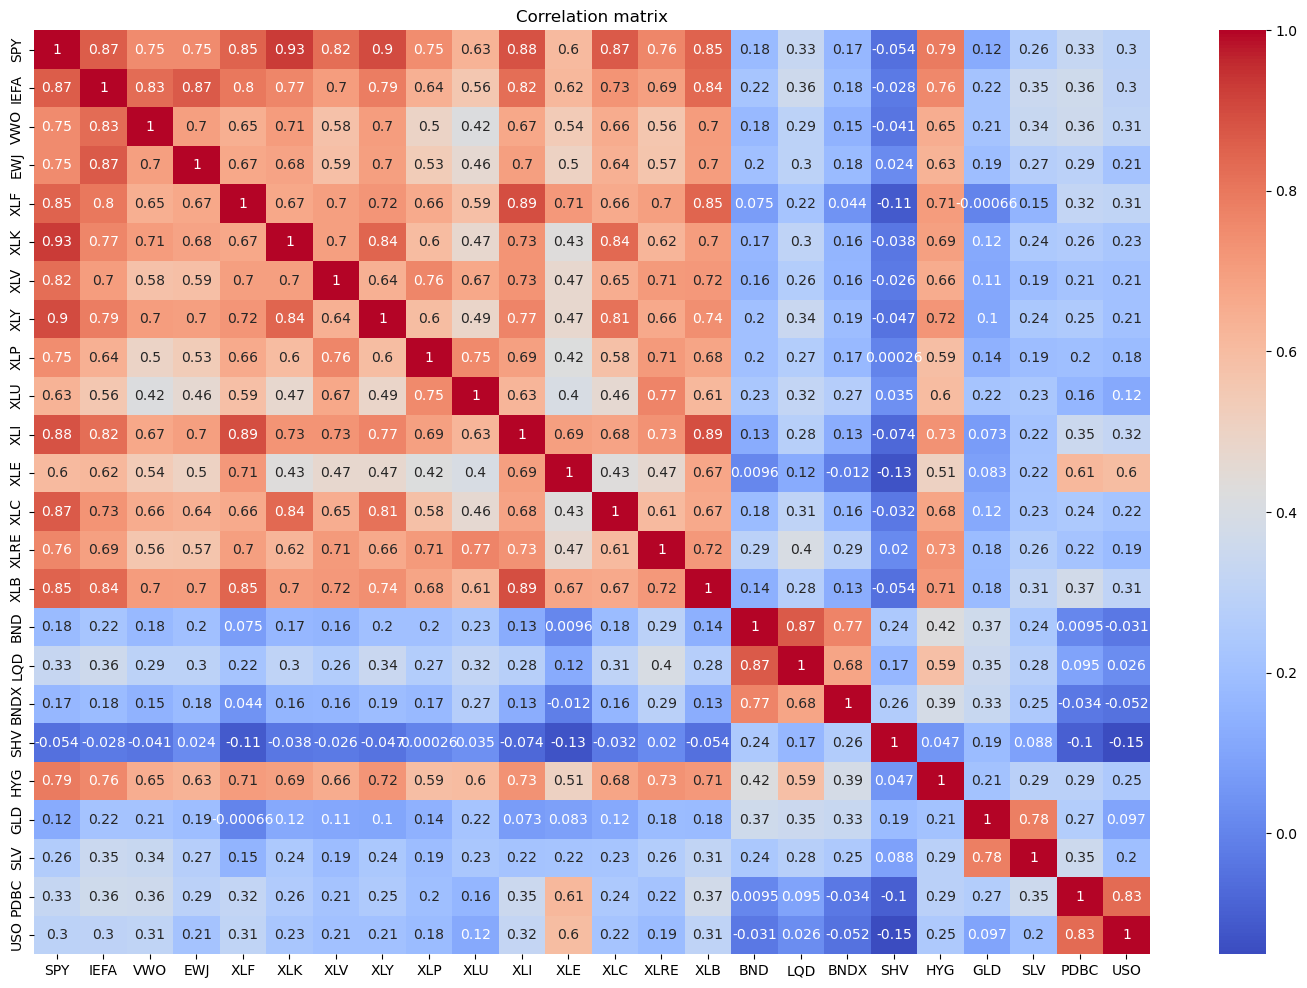

In [20]:
corr_matrix = change.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

In [21]:
cov_matrix = change.cov()

cov_matrix

,SPY,IEFA,VWO,EWJ,XLF,XLK,XLV,XLY,XLP,XLU,...,XLB,BND,LQD,BNDX,SHV,HYG,GLD,SLV,PDBC,USO
SPY,1.563938e-04,1.284316e-04,1.209135e-04,1.065129e-04,1.664722e-04,1.952644e-04,1.141032e-04,1.732646e-04,9.456856e-05,1.087107e-04,...,1.530042e-04,9.358774e-06,2.720537e-05,6.238875e-06,-1.267487e-07,6.106098e-05,1.441747e-05,6.146492e-05,4.916135e-05,9.834313e-05
IEFA,1.284316e-04,1.409270e-04,1.268042e-04,1.167861e-04,1.490475e-04,1.522063e-04,9.261293e-05,1.438595e-04,7.711255e-05,9.123672e-05,...,1.428415e-04,1.098820e-05,2.810651e-05,6.452961e-06,-6.102085e-08,5.572557e-05,2.421845e-05,7.842316e-05,5.160825e-05,9.512331e-05
VWO,1.209135e-04,1.268042e-04,1.660366e-04,1.019196e-04,1.309846e-04,1.525210e-04,8.311348e-05,1.392397e-04,6.476796e-05,7.428304e-05,...,1.302452e-04,9.393350e-06,2.485042e-05,5.620256e-06,-9.804740e-08,5.186549e-05,2.596352e-05,8.258305e-05,5.535950e-05,1.051413e-04
EWJ,1.065129e-04,1.167861e-04,1.019196e-04,1.284446e-04,1.194511e-04,1.300298e-04,7.377244e-05,1.215446e-04,6.138680e-05,7.182514e-05,...,1.142358e-04,9.503884e-06,2.200064e-05,6.084718e-06,5.049770e-08,4.442255e-05,2.075126e-05,5.899393e-05,3.991137e-05,6.429089e-05
XLF,1.664722e-04,1.490475e-04,1.309846e-04,1.194511e-04,2.462191e-04,1.757941e-04,1.215467e-04,1.751697e-04,1.049743e-04,1.267513e-04,...,1.907828e-04,4.878327e-06,2.245806e-05,2.059561e-06,-3.245765e-07,6.851841e-05,-9.709569e-08,4.578164e-05,6.027480e-05,1.292267e-04
XLK,1.952644e-04,1.522063e-04,1.525210e-04,1.300298e-04,1.757941e-04,2.806678e-04,1.298316e-04,2.181323e-04,1.025407e-04,1.088106e-04,...,1.692122e-04,1.158783e-05,3.346489e-05,7.908657e-06,-1.194094e-07,7.177899e-05,1.861282e-05,7.690918e-05,5.148398e-05,1.013875e-04
XLV,1.141032e-04,9.261293e-05,8.311348e-05,7.377244e-05,1.215467e-04,1.298316e-04,1.230501e-04,1.101997e-04,8.568431e-05,1.020699e-04,...,1.141794e-04,7.149766e-06,1.920552e-05,5.313275e-06,-5.391210e-08,4.505655e-05,1.143454e-05,3.987900e-05,2.851538e-05,6.013510e-05
XLY,1.732646e-04,1.438595e-04,1.392397e-04,1.215446e-04,1.751697e-04,2.181323e-04,1.101997e-04,2.377009e-04,9.301134e-05,1.028394e-04,...,1.640197e-04,1.297741e-05,3.446150e-05,8.615030e-06,-1.337147e-07,6.907108e-05,1.484006e-05,6.966221e-05,4.622887e-05,8.479015e-05
XLP,9.456856e-05,7.711255e-05,6.476796e-05,6.138680e-05,1.049743e-04,1.025407e-04,8.568431e-05,9.301134e-05,1.025861e-04,1.048797e-04,...,9.878526e-05,8.456153e-06,1.763109e-05,5.208502e-06,4.866945e-10,3.711096e-05,1.375689e-05,3.599146e-05,2.381929e-05,4.944829e-05
XLU,1.087107e-04,9.123672e-05,7.428304e-05,7.182514e-05,1.267513e-04,1.088106e-04,1.020699e-04,1.028394e-04,1.048797e-04,1.887837e-04,...,1.211886e-04,1.326766e-05,2.868428e-05,1.105139e-05,9.009215e-08,5.125255e-05,2.831787e-05,6.110395e-05,2.632501e-05,4.297786e-05


# Zadatak 2 - Analiza glavnih komponenti

2.1. Za analizu glavnih komponenti potrebno je izračunati svojstvenu dekompoziciju, koju možete pronaći u sklopu biblioteke NumPy https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html.

**Izračunajte svojstvene vektore i pripadajuće svojstvene vrijednosti matrice kovarijance povrata $\Sigma$. Poredajte komponente padajući po svojstvenim vrijednostima i prikažite svojstvene vrijednosti grafički.**



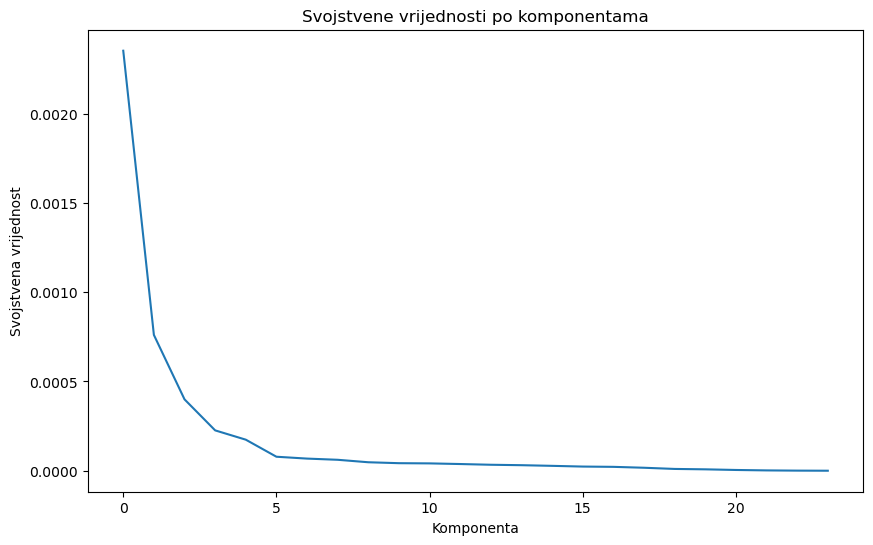

Svojstveni vektori:
 [[-2.43080116e-01  1.16839662e-01 -4.17742916e-02  1.22366216e-01
  -1.87520039e-02  1.38940956e-01  2.85677784e-02  4.92634796e-02
   2.79270211e-02 -8.98191727e-02  4.76147275e-02  3.30514056e-02
  -2.78417752e-02 -2.84333252e-02  5.20241771e-02 -1.08614434e-02
  -1.90840893e-02 -2.68297559e-03  1.21408716e-02  5.16406458e-03
   1.73400413e-02 -2.20564059e-02  9.32561515e-01  4.90491258e-03]
 [-2.19615263e-01  7.76246830e-02  3.02817003e-02  3.33362431e-02
   1.16802875e-01 -3.70149925e-01  3.93820510e-02  5.90479463e-02
   8.78545429e-02  9.31762195e-02 -2.82902981e-02  1.12589720e-01
  -4.64499396e-02  2.91481108e-02 -2.79572263e-02  4.62388945e-02
   7.53902799e-02 -6.09592620e-02 -8.15239815e-01  2.63086513e-01
  -9.41852160e-02 -1.08314220e-02  6.05563503e-04 -1.08275656e-03]
 [-2.09782221e-01  5.06032695e-02  5.81351024e-02  1.44515211e-01
   1.92822553e-01 -5.13627825e-01 -9.42521613e-02  2.64027192e-01
  -5.81354226e-01 -1.00300524e-01 -2.02345716e-01 -2.

In [22]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]


plt.figure(figsize=(10, 6))
plt.plot(range(len(eigenvalues)), eigenvalues)
plt.xlabel("Komponenta")
plt.ylabel("Svojstvena vrijednost")
plt.title("Svojstvene vrijednosti po komponentama")
plt.show()

print("Svojstveni vektori:\n", eigenvectors[:3])

2.2. **Izračunajte koliki udio varijance objašnjavaju prve tri komponente?**

In [23]:
explained_by_var = eigenvalues / np.sum(eigenvalues)

print(
    f"Varijanca objašnjena prvim trima komponentama: {explained_by_var[:3].sum()*100:.2f}%"
)

Varijanca objašnjena prvim trima komponentama: 78.65%


2.3. Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti.  

**Prikažite grafički (npr. stupčastim dijagramom za svaku komponentu posebno) koeficijente prve 3 glavne komponente (elemente prva tri svojstvena vektora).**

S obzirom na to koje vrijednosnice opisuju prve tri komponente, razmislite možete li zaključiti kakve zajedničke faktore u tržištu opisuju razmatrane komponente?

NAPOMENA: pripazite na to što vraća funkcija koju koristite i u kojoj se dimenziji (stupac ili red) nalaze svojstveni vektori.

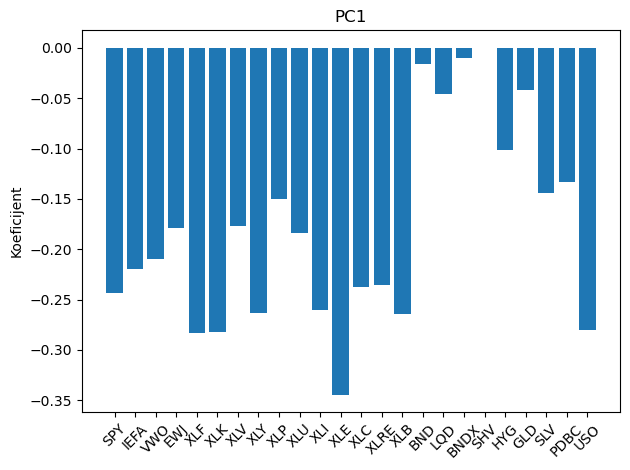

In [24]:
first_three = eigenvectors[:, :3]

plt.bar(tickers, first_three[:, 0])
plt.title(f"PC{1}")
plt.tick_params(axis="x", rotation=45)
plt.ylabel("Koeficijent")

plt.tight_layout()
plt.show()

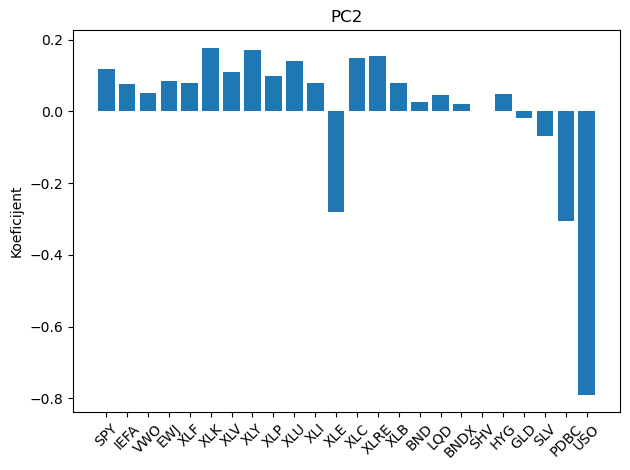

In [25]:
plt.bar(tickers, first_three[:, 1])
plt.title(f"PC{2}")
plt.tick_params(axis="x", rotation=45)
plt.ylabel("Koeficijent")

plt.tight_layout()
plt.show()

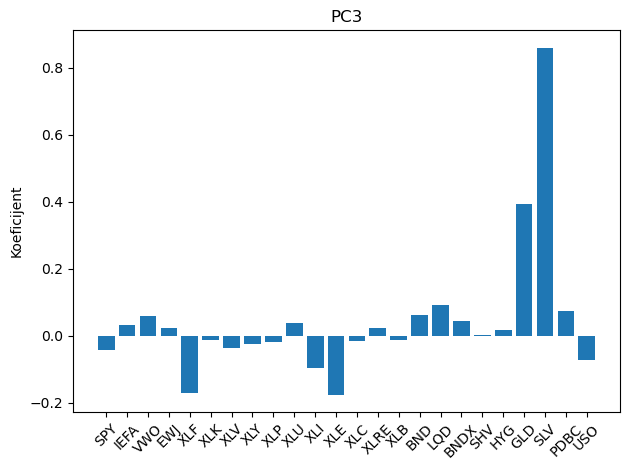

In [26]:
plt.bar(tickers, first_three[:, 2])
plt.title(f"PC{3}")
plt.tick_params(axis="x", rotation=45)
plt.ylabel("Koeficijent")

plt.tight_layout()
plt.show()

2.4. **Ponovite prethodnu analizu za matricu korelacije povrata $C$ (prikažite svojstvene vrijednosti, udio varijance i koeficijente pojedinih komponenti za prve tri komponente).**

Usporedite rezultate - mijenjaju li se interpretacije komponenti?

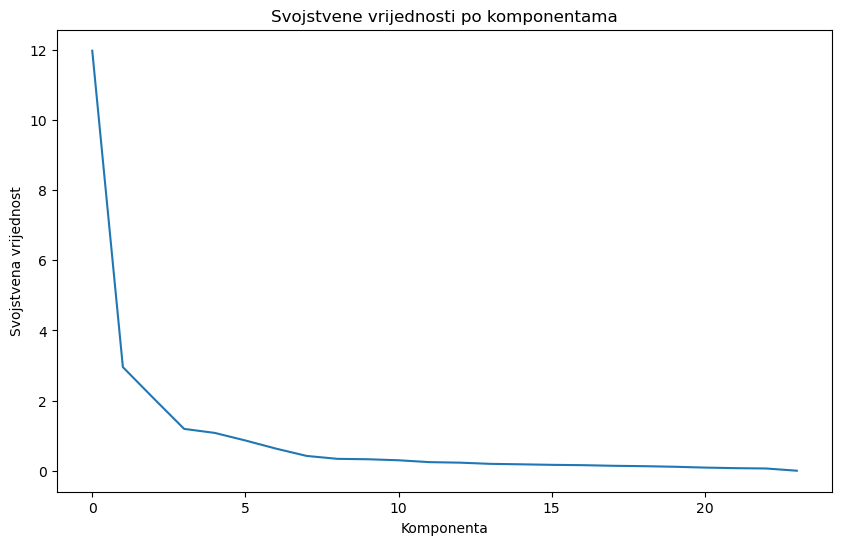

In [27]:
corr_eigenvalues, corr_eigenvectors = np.linalg.eig(corr_matrix)

idx = corr_eigenvalues.argsort()[::-1]
corr_eigenvalues = corr_eigenvalues[idx]
corr_eigenvectors = corr_eigenvectors[:, idx]

plt.figure(figsize=(10, 6))
plt.plot(range(len(corr_eigenvalues)), corr_eigenvalues)
plt.xlabel("Komponenta")
plt.ylabel("Svojstvena vrijednost")
plt.title("Svojstvene vrijednosti po komponentama")
plt.show()

In [28]:
explained_by_var = corr_eigenvalues / np.sum(corr_eigenvalues)

print(
    f"Variance explained by first three components: {explained_by_var[:3].sum()*100:.2f}%"
)

Variance explained by first three components: 70.82%


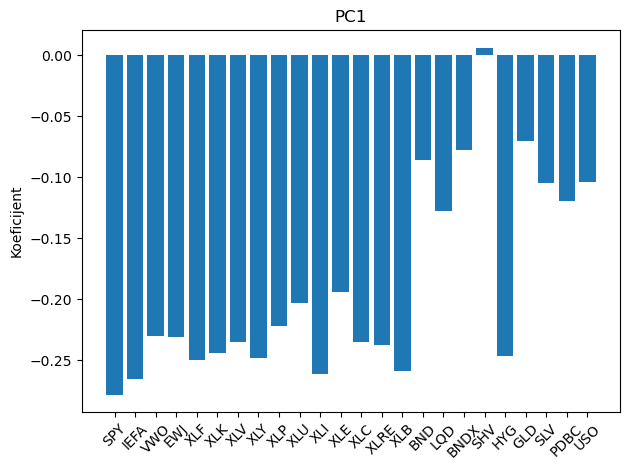

In [29]:
plt.bar(tickers, corr_eigenvectors[:, 0])
plt.title(f"PC{1}")
plt.tick_params(axis="x", rotation=45)
plt.ylabel("Koeficijent")

plt.tight_layout()
plt.show()

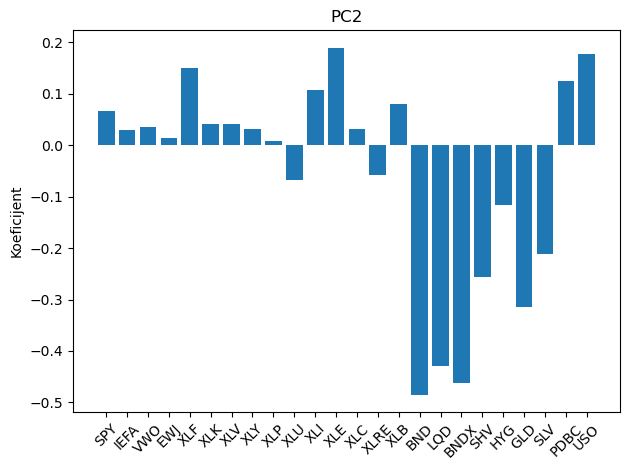

In [30]:
plt.bar(tickers, corr_eigenvectors[:, 1])
plt.title(f"PC{2}")
plt.tick_params(axis="x", rotation=45)
plt.ylabel("Koeficijent")

plt.tight_layout()
plt.show()

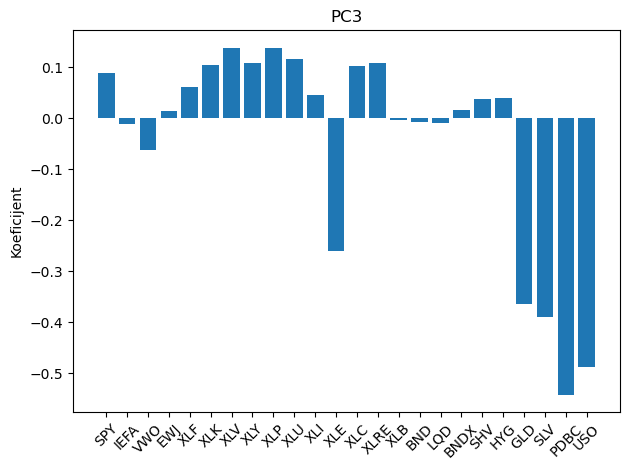

In [31]:
plt.bar(tickers, corr_eigenvectors[:, 2])
plt.title(f"PC{3}")
plt.tick_params(axis="x", rotation=45)
plt.ylabel("Koeficijent")

plt.tight_layout()
plt.show()

Postoje razlike u interpretaciji komponenti između korelacijske i kovarijantne matrice. Korelacijska matrica se standardizira na range [-1,1], što eliminira utjecaj volatilnosti na matricu. Korelacijska matrica gleda samo međuovisnost u kretanjima cijena među parovima vrijednosnica, kod kovarijance volatilnost utječe na glavne komponente i daje im veću težinu.

# Zadatak 3 - Svojstveni portfelji

U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji.

Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. Same težine svojstvenih portfelja mogu biti rotirane i skalirane u odnosu na elemente svojstvenih vektora.

U ovoj analizi ćemo pomnožiti njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna (konačni PCA rastav je i dalje isti ako svojstveni vektor pomnožimo s -1). Također, dobro je i skalirati svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti:

$\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.

Na taj način se osigurava da visoke magnitude pojedinih elemenata ne uzrokuju velike razlike u volatilnostima svojstvenih portfelja.

Ukoliko znamo povrate $R\in\mathbb{R}^{T\times N}$ (gdje je $R_i\in\mathbb{R}^{T}$ vektor povrata za vrijednosnicu $i$) za $N$ vrijednosnica u nekom vremenskom periodu od $T$ dana, povrate portfelja $w$ u tom istom periodu možemo izračunati kao:

$R_p = \sum{R_i w_i} = R\cdot w$.


**Izračunajte skalirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve tri glavne komponente dobivene iz matrice kovarijance $\Sigma$. Za ta tri svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za oba portfelja, npr. 100).**



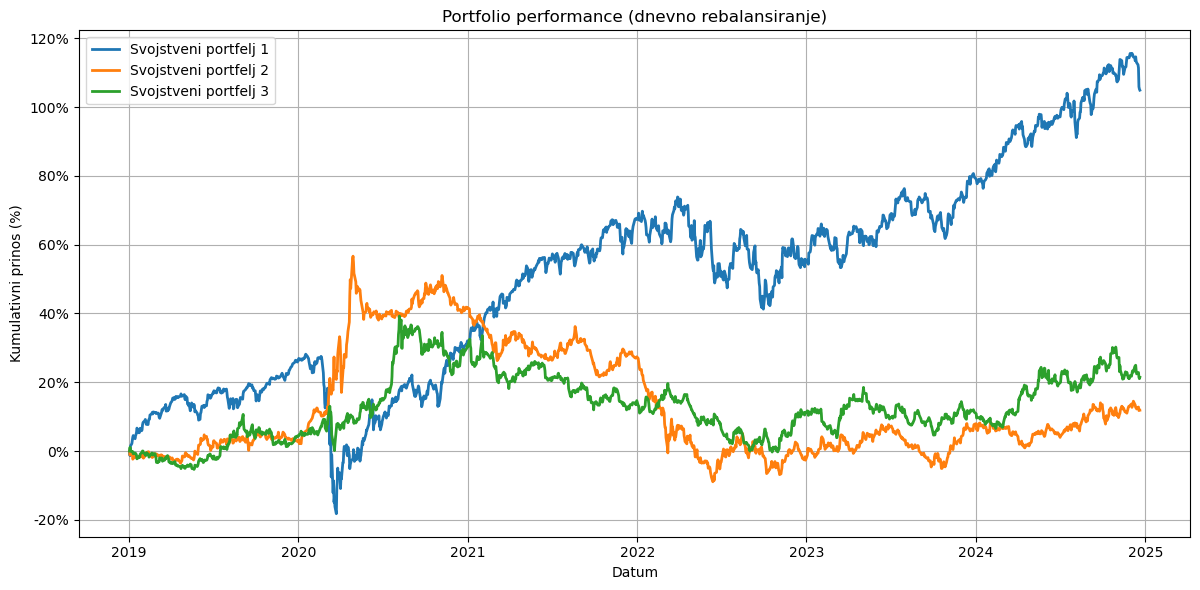

In [32]:
asset_returns = prices.pct_change().fillna(0)

plt.figure(figsize=(12, 6))

for comp_idx in range(3):
    weights = eigenvectors[:, comp_idx]
    if weights.sum() < 0:
        weights = -weights
    weights = weights / np.abs(weights).sum()

    portfolio_returns = asset_returns.values @ weights

    cum_returns = (1 + portfolio_returns).cumprod() - 1

    plt.plot(
        asset_returns.index,
        cum_returns * 100,
        label=f"Svojstveni portfelj {comp_idx+1}",
        linewidth=2
    )

plt.title("Portfolio performance (dnevno rebalansiranje)")
plt.xlabel("Datum")
plt.ylabel("Kumulativni prinos (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: "{:.0f}%".format(y)))

plt.show()


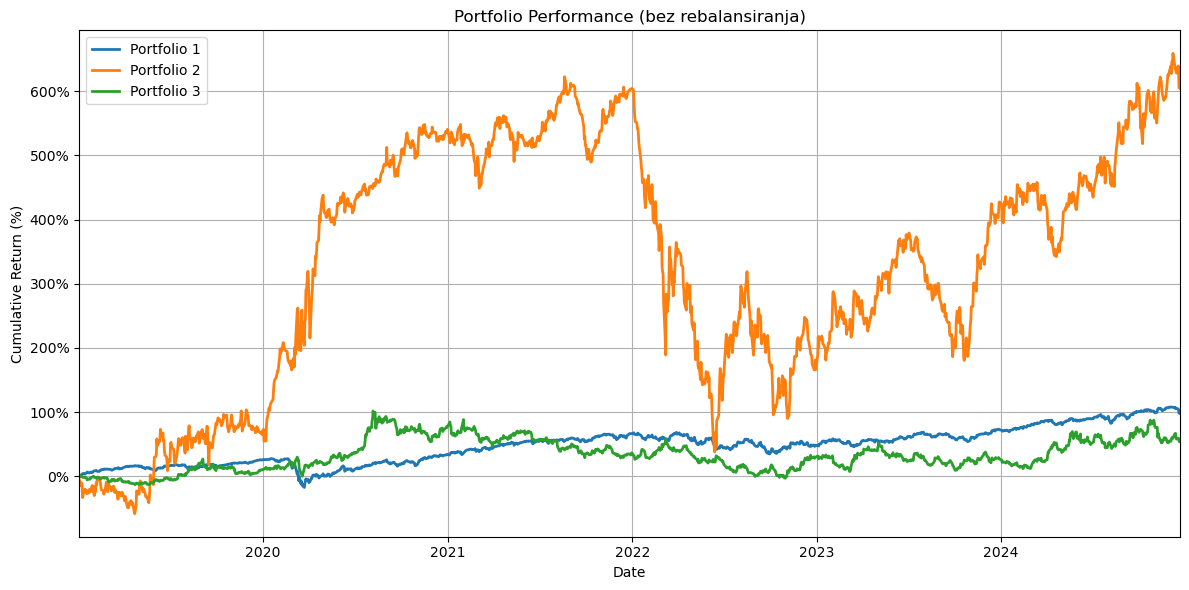

In [33]:
plt.figure(figsize=(12, 6))

all_portfolio_changes = {}

for k in range(3):
    weights = eigenvectors[:, k]
    if sum(weights) < 0:
        weights = -weights

    weights = weights / abs(weights.sum())

    port = pd.DataFrame(weights, index=tickers, columns=["Weights"]).T

    value = 100000

    # NE rebalansiramo dnevno, pretpostavljam pasivno investiranje
    # kupimo u početnom trenutku dionice i ne diramo ih, da rebalansiramo dnevno bi skalirali cijeli vektor povrata s weightovima
    start_prices = prices.iloc[0]
    shares = (port.iloc[0] * value) / start_prices

    port_prices = (prices * shares).sum(axis=1)

    port_change = port_prices.pct_change().fillna(0)
    all_portfolio_changes[k] = port_change
    cum = (1 + port_change).cumprod() - 1

    plt.plot(cum.index, cum * 100, label=f"Portfolio {k+1}", linewidth=2)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: "{:.0f}%".format(y)))
plt.xlim(cum.index.min(), cum.index.max())
plt.title("Portfolio Performance (bez rebalansiranja)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Ako usporedite dobivene rezultate s kretanjem cijena originalnih vrijednosnica, vidjet ćete sličnosti između vrijednosnica koje pripadaju određenim klasama imovina i pojedinih svojstvenih portfelja. Svojstveni portfelji dakle predstavljaju niže-dimenzionalan prostor tzv. sintetičkih vrijednosnica (u našem slučaju 3 umjesto originalnih 24) koje najbolje opisuju cijeli razmatrani skup podataka. Dobra procjena tih komponenti je ključna u razumijevanju zajedničkog kretanja većih skupova dionica i upravljanju financijskim rizikom.

Razmislite što to znači za tržište koje smo analizirali - koji su glavni izvori rizika prevladavali u razmatranom periodu?

**Izračunajte korelacijske koeficijente između povrata tri razmatrana svojstvena portfelja (realizacije prve tri glavne komponente) i svih pojedinih ETF-ova - za svaki od tri svojstvena portfelja pronađite ETF koji mu je najsličniji (najviši iznos korelacije povrata).**

In [34]:
for k in range(3):
    coeff = {}
    port_k = all_portfolio_changes[k]
    for tick in tickers:
        coeff[tick] = port_k.corr(change[tick])
    max_corr, ticker = max(coeff.values()), max(coeff, key=coeff.get)
    print(
        f"Portfelj {k+1} je najviše koreliran s ETF-om {ticker}, corr = {max_corr*100:.2f}%"
    )

# ovo ima smisla, ako gledamo glavne komponente pc1,pc2 i pc3, upravo etfovi najviše pridonose komponenti
# također i najbolje opisuju asset klase koje predstavljaju

Portfelj 1 je najviše koreliran s ETF-om SPY, corr = 96.58%
Portfelj 2 je najviše koreliran s ETF-om XLY, corr = 40.71%
Portfelj 3 je najviše koreliran s ETF-om SLV, corr = 91.51%
